<a href="https://colab.research.google.com/github/LilaR66/Defi-IA-bedbugs/blob/main/notebooks/DefiIA_interpretabilite_modeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interprétabilité
### Bedbugs
#### Lila R., Léa C., Flavie K.

L'objectif est d'expliquer les features les plus influentes dans la prédiction des prix d'hôtels. 

Nous allons utiliser des méthodes agnostiques, c'est à dire utilisant le modèle comme une boîte noire.

In [1]:
#import
import pandas as pd
import pickle

In [ ]:
#0 supprimer si pas d'erreurs
#!pip install pandas-profiling==2.8.0 > /dev/null 2>&1
#!pip install pandas==0.25 > /dev/null 2>&1
#!pip install numpy==1.16.5 > /dev/null 2>&1

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [3]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 4.9 MB/s eta 0:00:00


In [4]:
from google.colab import drive
import os

# drive conexion:
drive.mount('/content/drive') 

utilities_folder = '/content/drive/My Drive/Defi-IA-bedbugs/utilities'

os.chdir(utilities_folder) # placer dans le dossier utilites

from set_path import *
print(PATH)
print(PATH_CODE)
print(PATH_DATA)
#...etc 

import data_preprocessing as DP

Mounted at /content/drive
/content/drive/My Drive/Defi-IA-bedbugs
/content/drive/My Drive/Defi-IA-bedbugs/utilities
/content/drive/My Drive/Defi-IA-bedbugs/data


## Chargement des modèles

Entrainement des modèles et récupération de X_train Y_train, X_test, Y_test.

In [12]:
name_testKaggle = "test_set_cleaned_addedFeatures.csv"
name_requests = 'pricing_requests_clean.csv'
name_featHotels = 'features_hotels.csv'

'''!python models.py --train 1 --name 3 --adversarial 0 --hotelid 1 --name_save "lxgboost_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train1 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test1 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train1 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test1 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
'''!python models.py --train 1 --name 3 --adversarial 1 --hotelid 1 --name_save "lxgboost_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train2 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test2 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train2 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test2 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
'''!python models.py --train 1 --name 1 --adversarial 0 --hotelid 1 --name_save "rf_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train3 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test3 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train3 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test3 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
!python models.py --train 1 --name 1 --adversarial 1 --hotelid 1 --name_save "rf_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train4 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test4 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train4 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test4 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)
'''!python models.py --train 1 --name 0 --adversarial 0 --hotelid 1 --name_save "xgb_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train5 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test5 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train5 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test5 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
'''!python models.py --train 1 --name 0 --adversarial 1 --hotelid 1 --name_save "xgb_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train6 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test6 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train6 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test6 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
'''!python models.py --train 1 --name 2 --adversarial 0 --hotelid 1 --name_save "cat_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train7 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test7 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train7 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test7 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
'''!python models.py --train 1 --name 2 --adversarial 1 --hotelid 1 --name_save "cat_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train8 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test8 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train8 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test8 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''

début de la création des datasets (train, test, validation
1 features_hotels.csv 1 1
création des datasets ok
['city', 'language', 'brand', 'group', 'mobile', 'parking', 'pool', 'children_policy', 'stock', 'date', 'request_nb', 'pib', 'nb_tourists', 'nb_hab_km2', 'price_m2']
erreur du modèle 286.02698895681294
MSE: 287.38
le score en inférence vaut 0.95


'!python models.py --train 1 --name 2 --adversarial 1 --hotelid 1 --name_save "cat_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1\nX_train8 = pd.read_csv(PATH_DATA + \'/X_train.csv\', index_col = 0)\nX_test8 = pd.read_csv(PATH_DATA + \'/X_test.csv\', index_col = 0)\nY_train8 = pd.read_csv(PATH_DATA + \'/Y_train.csv\', index_col = 0)\nY_test8 = pd.read_csv(PATH_DATA + \'/Y_test.csv\', index_col = 0)'

In [25]:
lxgb_noad_val = pickle.load(open(PATH_MODELS + "/lxgboost_no_adversarial_dd.sav", 'rb'))
lxgb = pickle.load(open(PATH_MODELS + "/lxgboost_adversarial_dd.sav", 'rb'))
rf_noad_val = pickle.load(open(PATH_MODELS + "/rf_no_adversarial_dd.sav", 'rb'))
rf = pickle.load(open(PATH_MODELS + "/rf_adversarial_dd.sav", 'rb'))
#xgb_noad_val = pickle.load(open(PATH_MODELS + "/xgb_no_adversarial_dd.sav", 'rb'))
#xgb = pickle.load(open(PATH_MODELS + "/xgb_adversarial_dd.sav", 'rb'))
#cat_noad_val = pickle.load(open(PATH_MODELS + "/cat_no_adversarial_dd.sav", 'rb'))
#cat = pickle.load(open(PATH_MODELS + "/cat_adversarial_dd.sav", 'rb'))

In [26]:
X_train = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)

X_train.drop("request_number", axis=1, inplace = True)
X_test.drop("request_number", axis=1, inplace = True)
X_train.drop("hotel_id", axis=1, inplace = True)
X_test.drop("hotel_id", axis=1, inplace = True)

## Permutations

Dans cette partie, nous utilisons les permutations pour établir les features les plus importantes. 
Nous utilisons la librairie eli5. 
Cette méthode s'applique sur les modèles basés sur les arbres.


### **Codes**

In [27]:
# Installation de la librairie Eli5
!pip install eli5 > /dev/null 2>&1

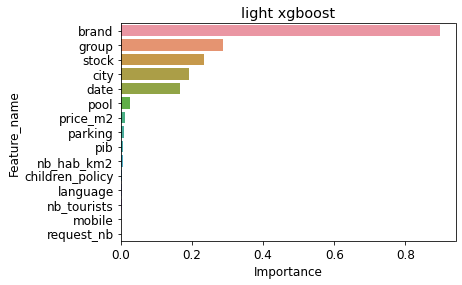

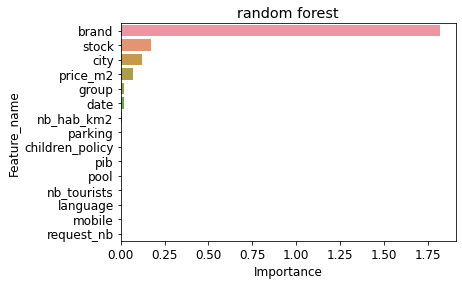

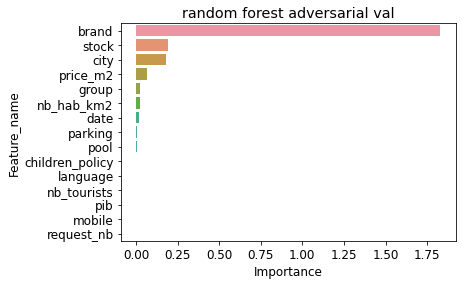

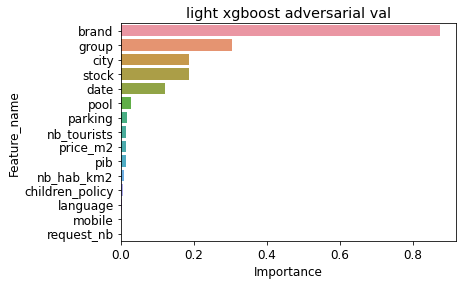

In [29]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

list_model = [lxgb_noad_val, rf_noad_val, rf, lxgb]
list_name = ['light xgboost', 'random forest', 'random forest adversarial val', 'light xgboost adversarial val']

#list_model = [rf]
#list_name = ['rf']

feature_names= X_train.columns.tolist()
features_importance_dict = {}
for model, name in zip(list_model, list_name):
  plt.figure()
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, Y_test)
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
  plt.title(name)

### Résultats

Permutation importance for random forest modèle sans  adversarial validation :

Il y a 4 features qui se distinguent : 
- brand
- stock
- ville
- prix au mètre carré


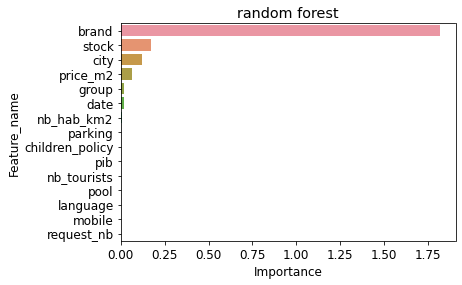<img 

Permutation importance for random forest modèle avec adversarial validation :

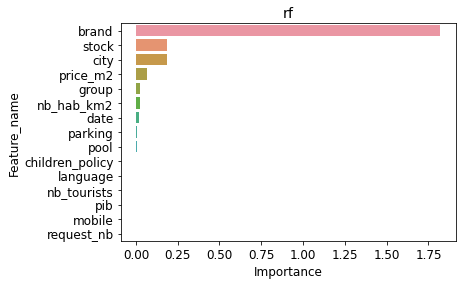

Permutation importance pour le modèle lxgb sans adversarial validation :

5 features se distinguant :
- brand
- group
- stock
- city
- date

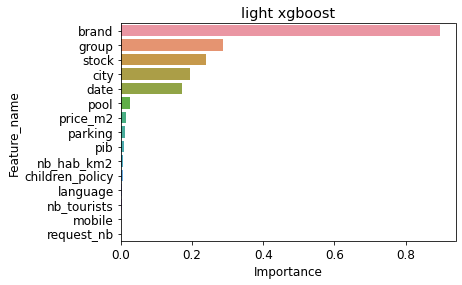

Permutation importance avec adversarial validation :

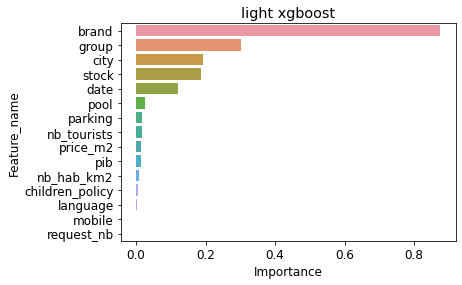

## PDP and ICE plots

Nous utilisons la librairie 'pdpbox'.

### Codes

In [17]:
!pip install pdpbox > /dev/null 2>&1

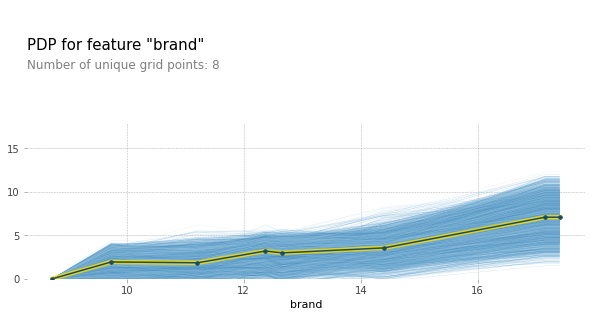

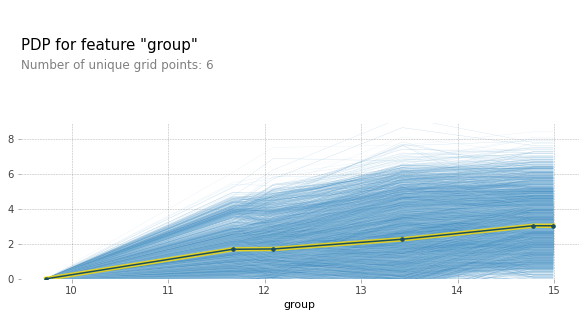

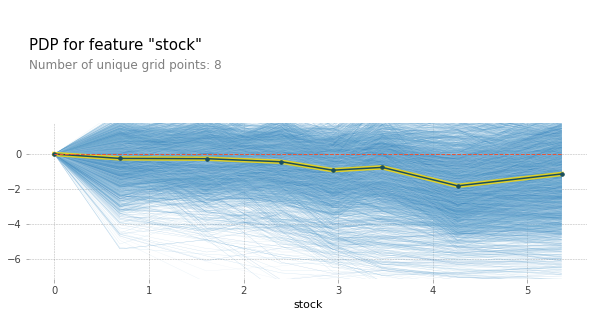

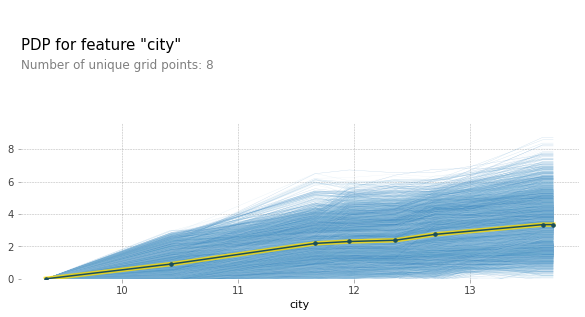

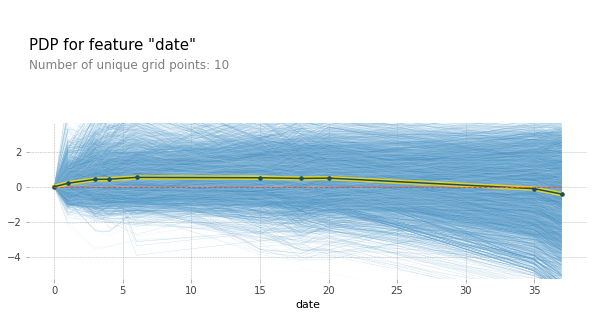

In [32]:
from pdpbox import pdp, get_dataset, info_plots


list_model = [lxgb_noad_val, rf_noad_val, rf, lxgb]
list_name = ['light xgboost', 'random forest', 'random forest adversarial val', 'light xgboost adversarial val']
model = lxgb_noad_val #lr, mlp
model_name = 'light xgboost'#'logistic regression' , 'multi layer perceptron'

top_features = features_importance_dict[model_name].Feature_name[:5].values
for i, feature in enumerate(top_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

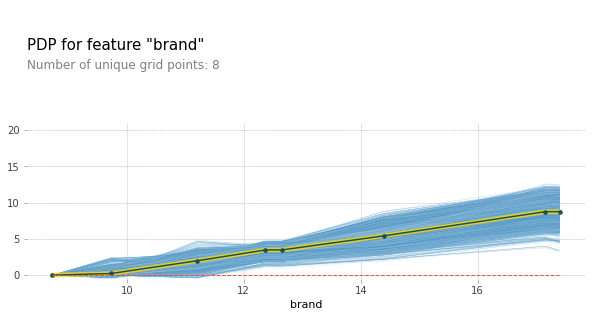

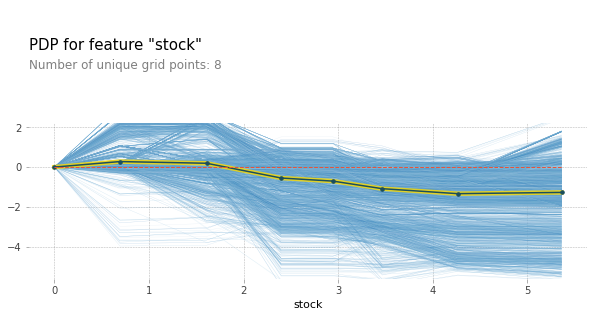

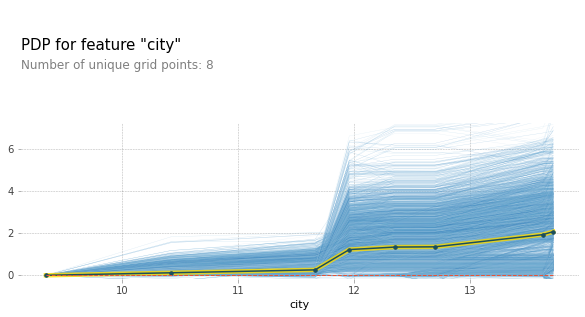

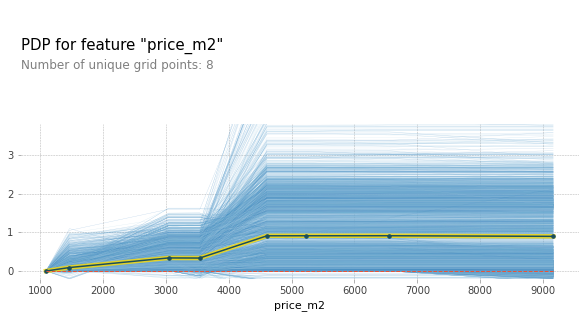

In [33]:
from pdpbox import pdp, get_dataset, info_plots
model = rf #lr, mlp
model_name = 'random forest adversarial val'#'logistic regression' , 'multi layer perceptron'

top_features = features_importance_dict[model_name].Feature_name[:4].values
for i, feature in enumerate(top_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

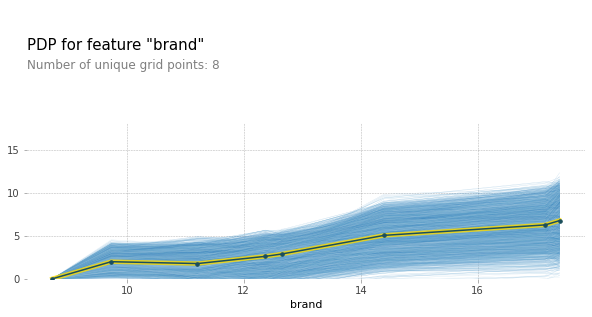

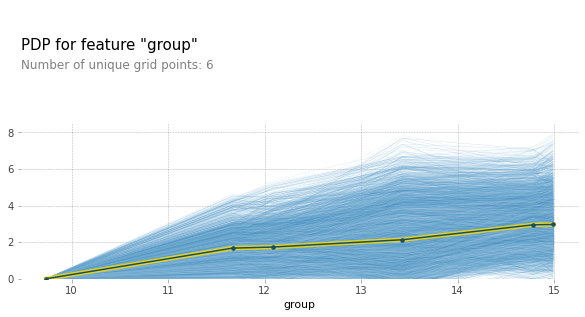

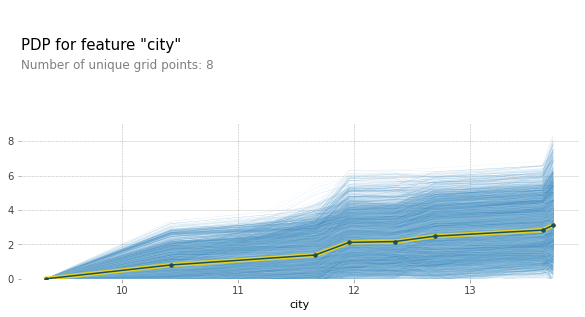

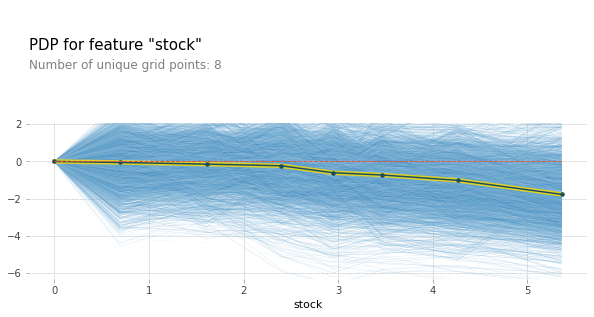

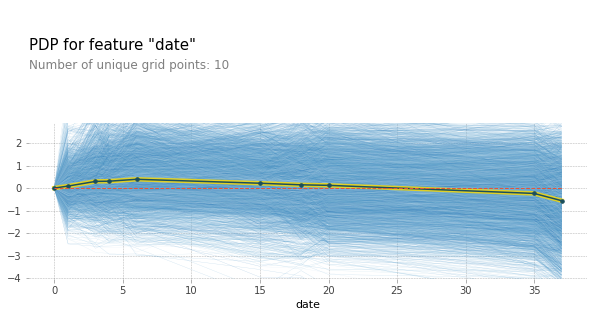

In [34]:
from pdpbox import pdp, get_dataset, info_plots
model = lxgb #lr, mlp
model_name = 'light xgboost adversarial val'#'logistic regression' , 'multi layer perceptron'

top_features = features_importance_dict[model_name].Feature_name[:5].values
for i, feature in enumerate(top_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

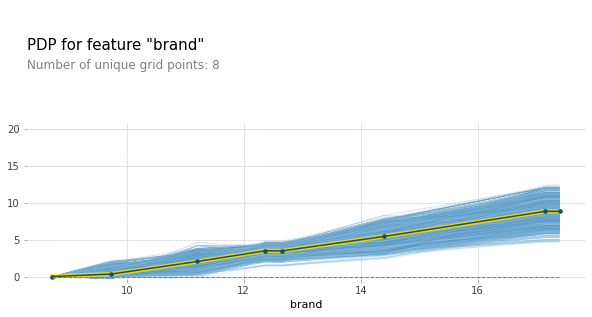

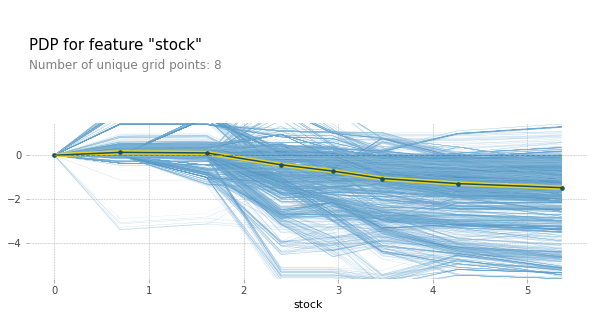

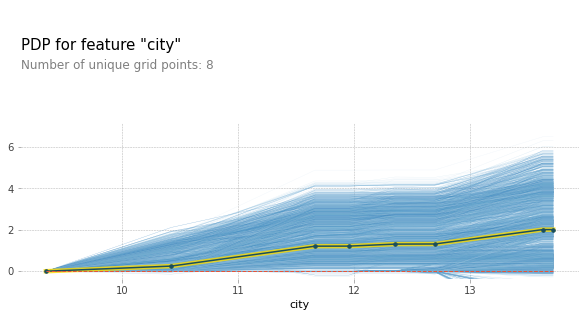

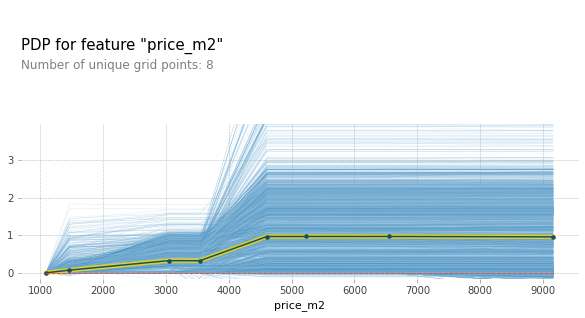

In [35]:
from pdpbox import pdp, get_dataset, info_plots
model = rf_noad_val #lr, mlp
model_name = 'random forest'#'logistic regression' , 'multi layer perceptron'

top_features = features_importance_dict[model_name].Feature_name[:4].values
for i, feature in enumerate(top_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

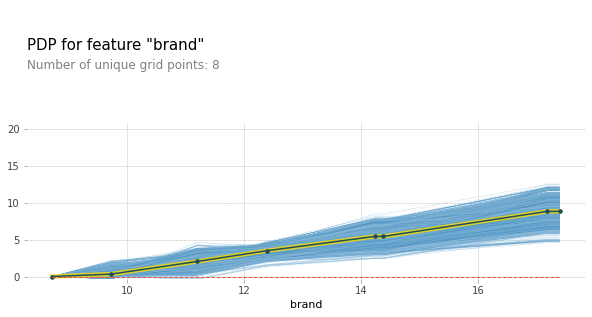

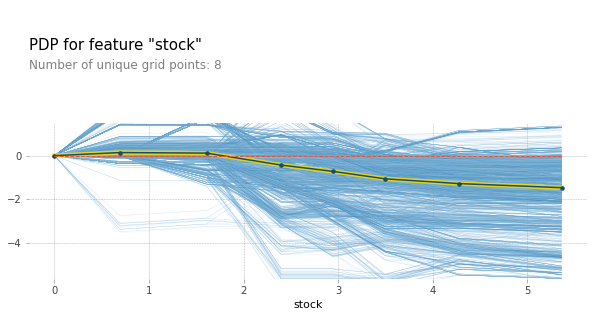

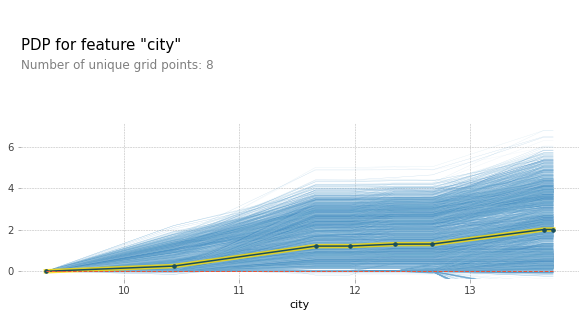

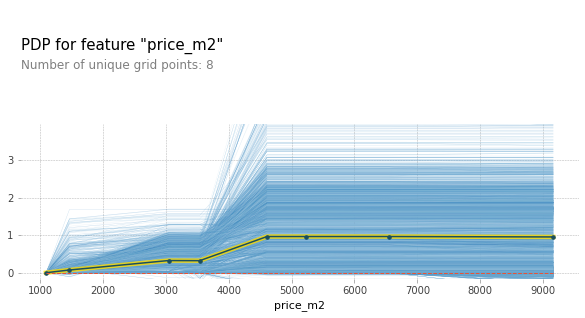

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
model = rf_noad_val #lr, mlp
model_name = 'random forest'#'logistic regression' , 'multi layer perceptron'

top_5_features = features_importance_dict[model_name].Feature_name[:5].values
for i, feature in enumerate(top_4_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

### Résultat et interprétation :    

-  une pente raide indique une relation forte entre la variable d'entrée et la variable cible, tandis qu'une pente faible indique une relation plus faible.

- Si la ligne a une pente croissante, cela indique une relation positive (c'est-à-dire que lorsque la variable d'entrée augmente, la variable cible augmente également). Si la ligne a une pente décroissante, cela indique une relation négative (c'est-à-dire que lorsque la variable d'entrée augmente, la variable cible diminue).

- Si la ligne n'est pas droite, cela peut indiquer une relation non linéaire.

Dans nos modèle, on voit que la variable brand a une pente forte donc la relation est forte entre le prix et la brand.
Le stock a une relation inversement proportionnel, plus il y a de stock moins la chambre est chère.
Il y a également une relation entre la ville et le prix ainsi que le prix au mètre carré jusqu'à un certain seuil ou l'influence n'augmente pas.
La relation avec la date est assez faible. on aubserve néanmoins une légère augmentation lorsque la date est proche et une légère diminution lorsque la date est éloignée.

## Plot des effets combinés de 2 fonctions : 

### Codes

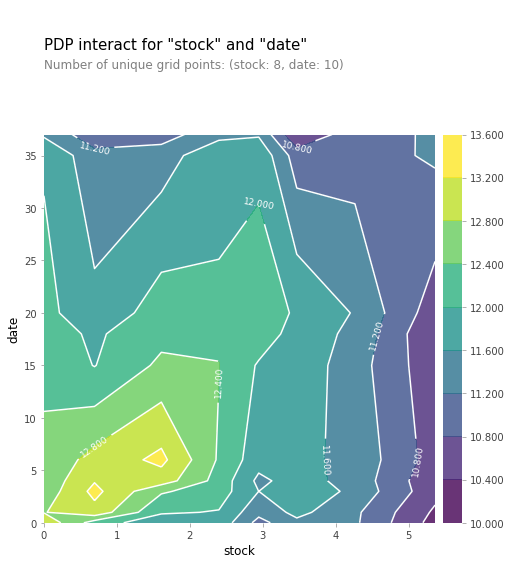

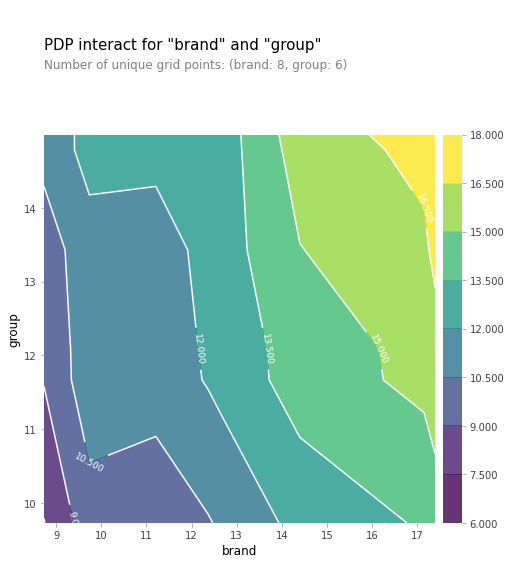

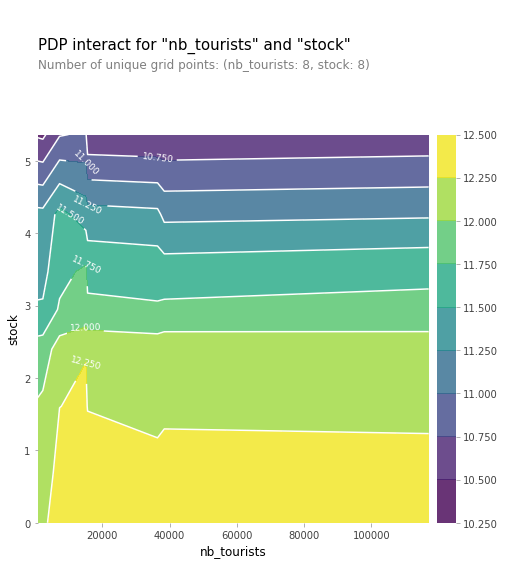

In [49]:
model = lxgb

# Créez le premier PDP.pdp_interact_plot et assignez-le à l'axe de gauche
features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

# Créez le deuxième PDP.pdp_interact_plot et assignez-le à l'axe de droite

features_to_plot = ['brand', 'group']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

features_to_plot = ['nb_tourists', 'stock']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

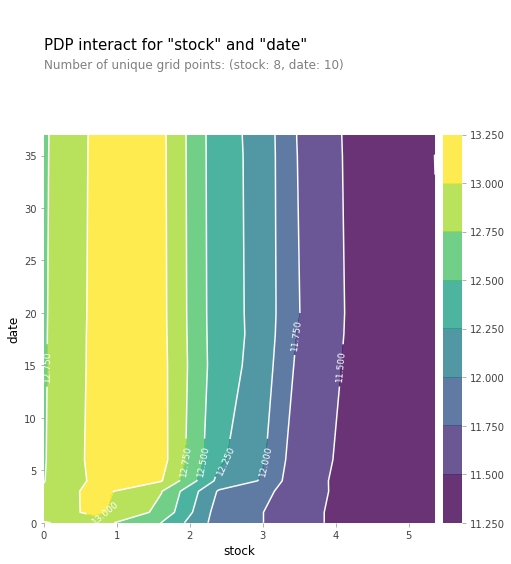

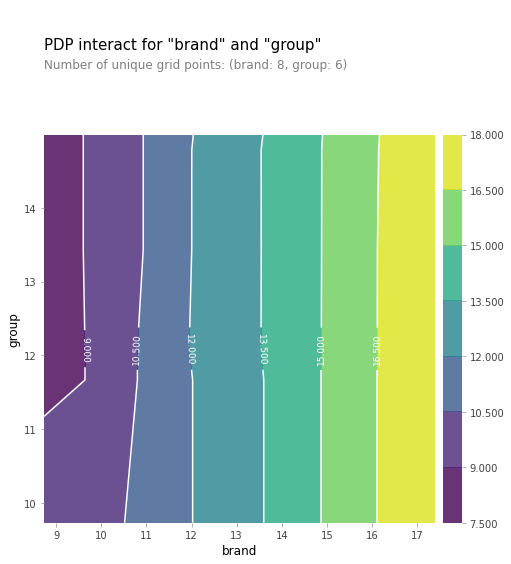

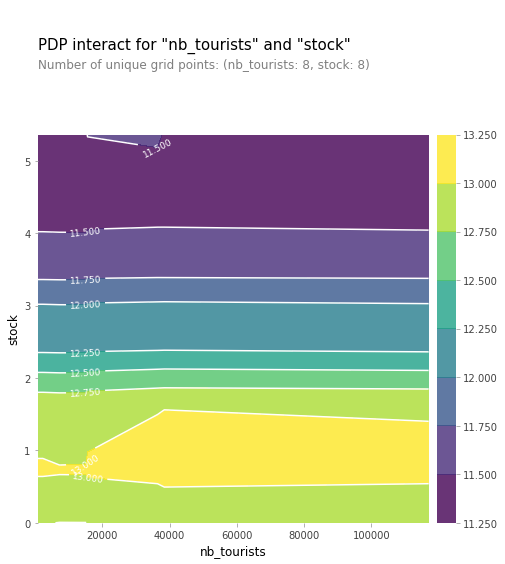

In [48]:
model = rf

# Créez le premier PDP.pdp_interact_plot et assignez-le à l'axe de gauche
features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

# Créez le deuxième PDP.pdp_interact_plot et assignez-le à l'axe de droite

features_to_plot = ['brand', 'group']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

features_to_plot = ['nb_tourists', 'stock']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### Résultats

Droites horizontales ou verticales = pas d'intéractions.

Pour le modèle lxgb : intéraction entre la date et le stock : plus la date est proche, plus le stock est bas.

Pour le model random forest : pas d'intéractions.

### SHAP

Previous methods provided global explanations of our models.  
We will now focus on local interpretability methods.  
We will begin with the SHAP methods based on the estimation of the Shapley values.  
The library SHAP implements the SHAP method (and many others).

Inspire yourself with the following [documentation](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html) to produce a visualization of the estimated Shapley values of your different models, first for a single example using the ```force_plot``` method and for the entire test, dataset using the ```summary_plot``` method.

In [ ]:
!pip install shap > /dev/null 2>&1

In [ ]:
import shap
shap.initjs() #needed to plot results directly on the notebook
model = lxgb_noad_val
#idx = 1 # index of the instance we want to explain

explainer = shap.KernelExplainer(model.predict, X_test)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:20,:]) #To speed up we just compute the shap values for 100 exemples
shap.summary_plot(shap_values, X_test.iloc[0:20,:])

### Lime  

We also saw in class another model agnostic local interpretability method.    
Many implementations of the LIME method are available in python.  
In this practical session, we will use the [implementation provided by the authors](https://github.com/marcotcr/lime).  

In [ ]:
!pip install lime > /dev/null 2>&1

LIME provides eay to understand an friendly looking explanations for your model predictions.  
You first need to instanciate an Explainer (in our case a ```LimeTabularExplainer```) and then call the ```explain instance``` method of the explainer to get the explanations.  

In [ ]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], model.predict, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)